In [ ]:
#Transfer learning with tensorflow - fine tuning
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


--2022-11-28 13:21:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-28 13:21:00 (115 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')
walk_through_dir('10_food_classes_10_percent')

--2022-11-28 13:21:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.65.80, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   228MB/s    in 0.7s    

2022-11-28 13:21:04 (228 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_fo

In [ ]:
import tensorflow as tf
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                         image_size = IMG_SIZE,
                                                         label_mode = 'categorical',
                                                         batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                         image_size = IMG_SIZE,
                                                         label_mode = 'categorical',
                                                         batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for images,labels in train_data.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.82714294e+02 1.68714294e+02 1.57714294e+02]
   [1.86474487e+02 1.72474487e+02 1.61474487e+02]
   [1.88785721e+02 1.74785721e+02 1.63785721e+02]
   ...
   [1.16285713e+02 1.09500008e+02 8.19285965e+01]
   [1.18474533e+02 1.12474533e+02 8.64745331e+01]
   [1.12658180e+02 1.08658180e+02 8.36581802e+01]]

  [[1.84214294e+02 1.70214294e+02 1.57214294e+02]
   [1.87005096e+02 1.73005096e+02 1.60005096e+02]
   [1.89571426e+02 1.75571426e+02 1.62571426e+02]
   ...
   [1.18000000e+02 1.11214294e+02 8.56428833e+01]
   [1.18928589e+02 1.12928589e+02 8.89285889e+01]
   [1.13382668e+02 1.09382668e+02 8.43826675e+01]]

  [[1.89428574e+02 1.75785721e+02 1.59785721e+02]
   [1.89229599e+02 1.75586731e+02 1.59586731e+02]
   [1.89596939e+02 1.75954086e+02 1.59954086e+02]
   ...
   [1.21382660e+02 1.13811249e+02 9.05969543e+01]
   [1.23658195e+02 1.17658195e+02 9.36581955e+01]
   [1.20852051e+02 1.16852051e+02 9.18520508e+01]]

  ...

  [[1.25224564e+02 1.11581772e+02 9.60715179e+01]
   [1

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
#normalizing iputs if needed

x = base_model(inputs)
print(f'shape after passing inputs {x.shape}')
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
print(f'SHape after pooling {x.shape}')
outputs = tf.keras.layers.Dense(10,activation = 'softmax', name ='output_layer')(x)

16705208/16705208 [==============================] - 1s 0us/step
shape after passing inputs (None, 7, 7, 1280)
SHape after pooling (None, 1280)


In [ ]:
model_0 = tf.keras.Model(inputs,outputs)
model_0.compile(loss = 'categorical_crossentropy',
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])
history_0 = model_0.fit(train_data,epochs = 10,steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/10
24/24 [==============================] - 27s 540ms/step - loss: 1.9302 - accuracy: 0.4120 - val_loss: 1.3395 - val_accuracy: 0.7364
Epoch 2/10
24/24 [==============================] - 8s 341ms/step - loss: 1.1319 - accuracy: 0.7453 - val_loss: 0.8868 - val_accuracy: 0.8176
Epoch 3/10
24/24 [==============================] - 9s 351ms/step - loss: 0.8116 - accuracy: 0.8093 - val_loss: 0.7058 - val_accuracy: 0.8452
Epoch 4/10
24/24 [==============================] - 9s 358ms/step - loss: 0.6494 - accuracy: 0.8653 - val_loss: 0.6138 - val_accuracy: 0.8584
Epoch 5/10
24/24 [==============================] - 9s 356ms/step - loss: 0.5518 - accuracy: 0.8720 - val_loss: 0.5616 - val_accuracy: 0.8612
Epoch 6/10
24/24 [==============================] - 8s 336ms/step - loss: 0.4835 - accuracy: 0.8840 - val_loss: 0.5214 - val_accuracy: 0.8672
Epoch 7/10
24/24 [==============================] - 8s 343ms/step - loss: 0.4305 - accuracy: 0.9080 - val_loss: 0.4933 - val_accuracy: 0.8708
Epoch

In [ ]:
#gettinga feature vector from trained model
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
global_averaged_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

Model 0 - basic

Model 1 - feature extraction, data augmentation, 1% of the data

Model 2 - feature extraction, data augmentation, 10% of the data

Model 3 - fine tuning extraction, data augmentation, 10% of the data

Model 4 - fine tuning extraction, data augmentation, 100% of the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2022-11-28 13:21:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.65.80, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   193MB/s    in 0.7s    

2022-11-28 13:21:13 (193 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir_1_percent ='10_food_classes_1_percent/test'
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There a

In [ ]:
#setup data loaders
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_1_percent,
                                                                 label_mode = 'categorical',
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE)
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir_1_percent,
                                                                 label_mode = 'categorical',
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#data augmentation stage 

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)], name = 'data_augmentation')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping 
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/'+ target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mping.imread(random_image_path)
plt.imshow(img)
plt.axis(False)

augmented_image = data_augmentation(tf.expand_dims(img, axis = 0),training = True)
plt.figure()
plt.imshow(tf.squeeze(augmented_image)/255.)

NameError: ignored

In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = layers.Input(shape = input_shape, name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D(name = 'Global_average_pooling')(x)
outputs = layers.Dense(10,activation = 'softmax', name = 'output_layer')(x)
model_1 = keras.Model(inputs,outputs)
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_1 = model_1.fit(train_data_1_percent, epochs = 5, steps_per_epoch = len(train_data_1_percent),validation_data = test_data_1_percent, validation_steps = len(test_data_1_percent), callbacks = create_tensorboard_callback(dir_name = 'tranfer_learning',
                                                                                                                                                                                                                                   experiment_name = '1_percent_data_augmented'))

Saving TensorBoard log files to: tranfer_learning/1_percent_data_augmented/20221128-132201
Epoch 1/5
3/3 [==============================] - 17s 5s/step - loss: 2.3060 - accuracy: 0.0714 - val_loss: 2.2415 - val_accuracy: 0.1484
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.0460 - accuracy: 0.2429 - val_loss: 2.1066 - val_accuracy: 0.2488
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.8778 - accuracy: 0.4143 - val_loss: 1.9845 - val_accuracy: 0.3640
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.6841 - accuracy: 0.5571 - val_loss: 1.8745 - val_accuracy: 0.4620
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.5389 - accuracy: 0.7143 - val_loss: 1.7776 - val_accuracy: 0.5296


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

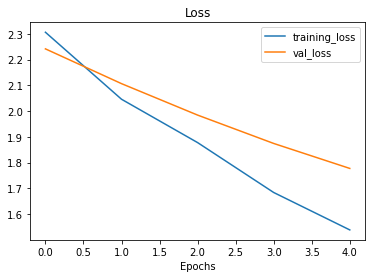

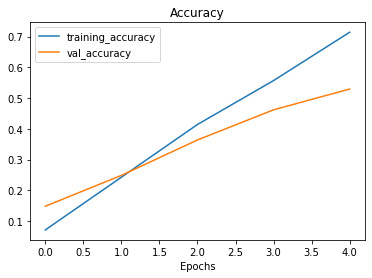

In [ ]:
plot_loss_curves(history_1)

In [ ]:
#checkpoint path
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = False,
                                                         save_best_only = False,
                                                         save_freq = 'epoch',
                                                         verbose = 1)

inputs2 = layers.Input(shape = input_shape, name = 'input_layer')
x = data_augmentation(inputs2)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D(name = 'Global_average_pooling')(x)
outputs2 = layers.Dense(10,activation = 'softmax', name = 'output_layer')(x)
model_2 = keras.Model(inputs2,outputs2)
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),validation_data = test_data, validation_steps = len(test_data), callbacks = [create_tensorboard_callback(dir_name = 'tranfer_learning',experiment_name = '10_percent_data_augmented'),checkpoint_callback])



Saving TensorBoard log files to: tranfer_learning/10_percent_data_augmented/20221128-141010
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.1626 - accuracy: 0.6133
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 61s 2s/step - loss: 1.1626 - accuracy: 0.6133 - val_loss: 0.5211 - val_accuracy: 0.8264
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.4646 - accuracy: 0.8493
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 50s 2s/step - loss: 0.4646 - accuracy: 0.8493 - val_loss: 0.4806 - val_accuracy: 0.8388
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.2760 - accuracy: 0.9200
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 52s 2s/step - loss: 0.2760 - accuracy: 0.9200 - val_loss: 0.4441 - val_accuracy: 0.8588
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.1836 - accuracy: 0.9480
Epoch 4: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 51s 2s/step - loss: 0.1836 - accuracy: 0.9480 - val_loss: 0.4784 - val_accuracy: 0.8464
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.1394 - accuracy: 0.9520
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 51s 2s/step - loss: 0.1394 - accuracy: 0.9520 - val_loss: 0.5845 - val_accuracy: 0.8120


79/79 [==============================] - 7s 76ms/step - loss: 0.4899 - accuracy: 0.8620


[0.48985418677330017, 0.8619999885559082]

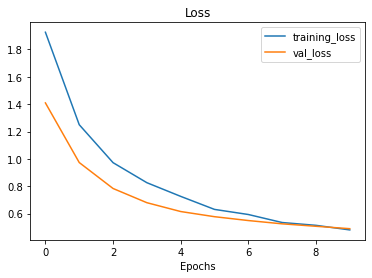

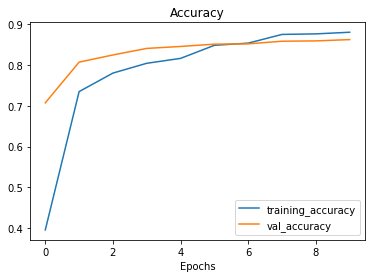

In [ ]:
#loading in checkpointed weights
plot_loss_curves(history_2)
model_2. load_weights(checkpoint_path)
loaded_model_2_results = model_2.evaluate(test_data)
loaded_model_2_results

In [ ]:
#model 3 - fine tuning
#fine tuning usually works best with pre trained feature extractio nmodel for a few epoochs
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


When fine tuning lower the learning rate(at least 10x)

In [ ]:
history_2_fine_tuned = model_2.fit(train_data, epochs = 10, steps_per_epoch = len(train_data),validation_data = test_data, initial_epoch =history_2.epoch[-1], validation_steps = len(test_data), callbacks = [create_tensorboard_callback(dir_name = 'tranfer_learning',experiment_name = 'fine_tuned_10_percent_data_augmented'),checkpoint_callback])

Saving TensorBoard log files to: tranfer_learning/fine_tuned_10_percent_data_augmented/20221128-133621
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.5883 - accuracy: 0.8333
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 88s 4s/step - loss: 0.5883 - accuracy: 0.8333 - val_loss: 0.4793 - val_accuracy: 0.8572
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.8507
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 53s 2s/step - loss: 0.4968 - accuracy: 0.8507 - val_loss: 0.4403 - val_accuracy: 0.8608
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8733
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 53s 2s/step - loss: 0.4288 - accuracy: 0.8733 - val_loss: 0.4344 - val_accuracy: 0.8584
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.8827
Epoch 8: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 54s 2s/step - loss: 0.3859 - accuracy: 0.8827 - val_loss: 0.4256 - val_accuracy: 0.8656
Epoch 9/10
24/24 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.8987
Epoch 9: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 54s 2s/step - loss: 0.3517 - accuracy: 0.8987 - val_loss: 0.4079 - val_accuracy: 0.8704
Epoch 10/10
24/24 [==============================] - ETA: 0s - loss: 0.3183 - accuracy: 0.9067
Epoch 10: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


24/24 [==============================] - 65s 3s/step - loss: 0.3183 - accuracy: 0.9067 - val_loss: 0.3983 - val_accuracy: 0.8684


In [ ]:
def compare_histories(history1, history2,initial_epochs = 5):
  acc = history1.history['accuracy']
  loss = history1.history['loss']
  val_loss = history1.history['val_loss']
  val_acc = history1.history['val_accuracy']
  total_acc = acc + history2.history['accuracy']
  total_loss = loss + history2.history['loss']
  total_val_acc = val_acc + history2.history['val_accuracy']
  total_val_loss = val_loss + history2.history['val_loss']

  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label = 'Training accuracy')
  plt.plot(total_val_acc, label = 'Testing accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label = 'Start Fine Tuning')
  plt.legend(loc = 'lower right')
  plt.title('Training and validation_accuracy')

  plt.subplot(2,1,2)
  plt.plot(total_loss, label = 'Training accuracy')
  plt.plot(total_val_loss, label = 'Testing accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label = 'Start Fine Tuning')
  plt.legend(loc = 'lower right')
  plt.title('Training and validation loss')

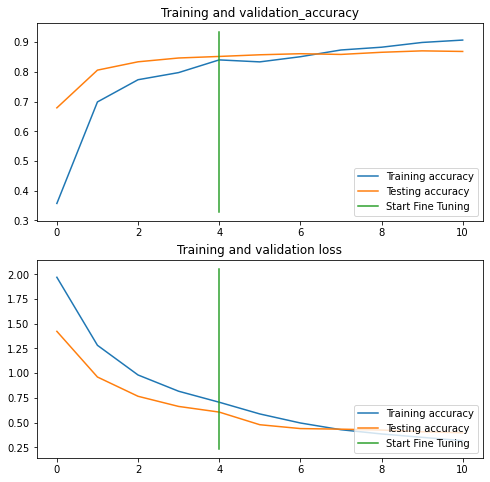

In [ ]:
compare_histories(history_2, history_2_fine_tuned)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')


--2022-11-28 14:01:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   140MB/s    in 3.5s    

2022-11-28 14:01:18 (139 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [ ]:
train_data_all= tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE)
test_data_all = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#load  weights from checkpoint

model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.5845 - accuracy: 0.8120


[0.5844652056694031, 0.8119999766349792]

In [ ]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_2_fine_tuned_all_data = model_2.fit(train_data_all, epochs = 10, steps_per_epoch = len(train_data_all),validation_data = test_data_all, initial_epoch =history_2.epoch[-1], validation_steps = len(test_data_all), callbacks = [create_tensorboard_callback(dir_name = 'tranfer_learning',experiment_name = 'fine_tuned_all_data_augmented'),checkpoint_callback])

Saving TensorBoard log files to: tranfer_learning/fine_tuned_all_data_augmented/20221128-142814
Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.5744 - accuracy: 0.8188
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


235/235 [==============================] - 110s 435ms/step - loss: 0.5744 - accuracy: 0.8188 - val_loss: 0.3039 - val_accuracy: 0.9012
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.3967 - accuracy: 0.8691
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


235/235 [==============================] - 96s 405ms/step - loss: 0.3967 - accuracy: 0.8691 - val_loss: 0.2881 - val_accuracy: 0.9064
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.3278 - accuracy: 0.8948
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


235/235 [==============================] - 91s 388ms/step - loss: 0.3278 - accuracy: 0.8948 - val_loss: 0.2638 - val_accuracy: 0.9160
Epoch 8/10
235/235 [==============================] - ETA: 0s - loss: 0.2682 - accuracy: 0.9117
Epoch 8: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


235/235 [==============================] - 100s 422ms/step - loss: 0.2682 - accuracy: 0.9117 - val_loss: 0.2803 - val_accuracy: 0.9108
Epoch 9/10
235/235 [==============================] - ETA: 0s - loss: 0.2188 - accuracy: 0.9283
Epoch 9: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


235/235 [==============================] - 90s 379ms/step - loss: 0.2188 - accuracy: 0.9283 - val_loss: 0.3036 - val_accuracy: 0.9056
Epoch 10/10
235/235 [==============================] - ETA: 0s - loss: 0.1946 - accuracy: 0.9348
Epoch 10: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


235/235 [==============================] - 86s 366ms/step - loss: 0.1946 - accuracy: 0.9348 - val_loss: 0.2706 - val_accuracy: 0.9176


In [ ]:
!tensorboard dev upload --logdir ./tranfer_learning\
  --name ' experiment'\
  --description 'comparing models'\
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tranfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=GUQrLM9OqW9nkhNoTA7yc9Iba6LWyj&prompt=consent&access_type=of

In [ ]:
def make_prediction(chosen_class:str):
  directory = '10_food_classes_all_data/test/'+ chosen_class
  random_image = random.choice(os.listdir(directory))
  random_image_path = directory + '/' + random_image
  img = mping.imread(random_image_path)
  print(img)
  plt.imshow(img)
  plt.axis(False)
  image_test = tf.image.resize(img,(224,224))
  print(image_test.shape)
  prediction = model_2.predict(tf.expand_dims(image_test,axis = 0))
  return prediction


In [ ]:
make_prediction('steak')

NameError: ignored